Import Packages

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [33]:
parent_dir = '../../../data/thread_ring/3/'

df = pd.read_csv(f'{parent_dir}/aggregate_energy_results.csv')


Preview the Data

In [34]:
print("Data:")
print(df.shape)
df.head(15)

Data:
(7, 5)


,Iterations,N,R,Erlang Energy Consumption(J),Scala Energy Consumption(J)
0,10,10000,1000000000,51625.976353,131262.540515
1,10,50000,1000000000,67486.114892,151198.245216
2,10,100000,1000000000,69392.126396,148241.887966
3,10,500000,1000000000,67534.243074,151986.434269
4,10,1000000,1000000000,62887.731373,154741.592739
5,10,5000000,1000000000,666956.155610,232961.020767
6,10,10000000,1000000000,640072.398768,251226.398349


Add Custom Column for N and R

In [35]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

In [36]:
# Combine N (Number of Actors) and R (Number of Rounds) into a new column for x-axis label
df['N_R'] = "(N=" + df['N'].apply(format_number_str) + ", R=" + df['R'].apply(format_number_str) + ")"
df.head(15)

,Iterations,N,R,Erlang Energy Consumption(J),Scala Energy Consumption(J),N_R
0,10,10000,1000000000,51625.976353,131262.540515,"(N=10K, R=1B)"
1,10,50000,1000000000,67486.114892,151198.245216,"(N=50K, R=1B)"
2,10,100000,1000000000,69392.126396,148241.887966,"(N=100K, R=1B)"
3,10,500000,1000000000,67534.243074,151986.434269,"(N=500K, R=1B)"
4,10,1000000,1000000000,62887.731373,154741.592739,"(N=1M, R=1B)"
5,10,5000000,1000000000,666956.155610,232961.020767,"(N=5M, R=1B)"
6,10,10000000,1000000000,640072.398768,251226.398349,"(N=10M, R=1B)"


Visualize the Data

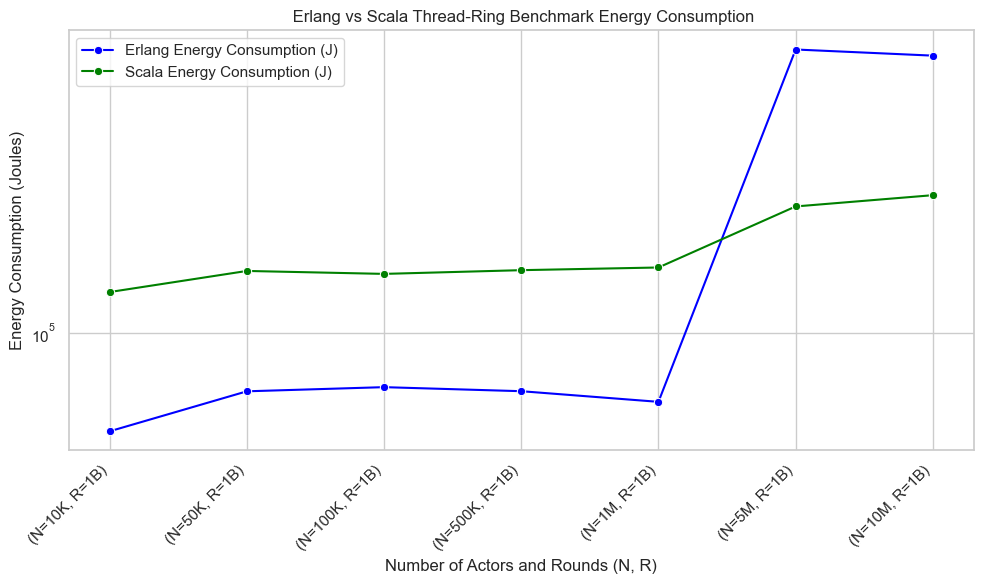

In [37]:
# Set the plot style
sns.set_theme(style="whitegrid", palette="muted")

# Plotting the energy consumption
plt.figure(figsize=(10, 6))

# Plot Erlang and Scala energy consumption
sns.lineplot(x="N_R", y="Erlang Energy Consumption(J)", data=df, marker='o', label="Erlang Energy Consumption (J)", color="blue")
sns.lineplot(x="N_R", y="Scala Energy Consumption(J)", data=df, marker='o', label="Scala Energy Consumption (J)", color="green")

# Adding labels and title
plt.xlabel("Number of Actors and Rounds (N, R)")
plt.ylabel("Energy Consumption (Joules)")
plt.title(" Erlang vs Scala Thread-Ring Benchmark Energy Consumption")
# plt.xscale("log")
plt.yscale("log")

# # Display legend
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
